In [ ]:
# 참고 사이트

"""
www.python.org
www.scipy.org
www.numpy.org

"""

# 벡터, 행렬 연산.
# 연립방정식 풀이, 가우스 소거법.

In [5]:
def func(x,y):
    return x+y

In [3]:
# Lambda statement

a = lambda x, y: x + y

In [4]:
a(1,2)

3

In [6]:
func(1,2)

3

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from numpy import sin

In [9]:
sin(np.pi/2)

1.0

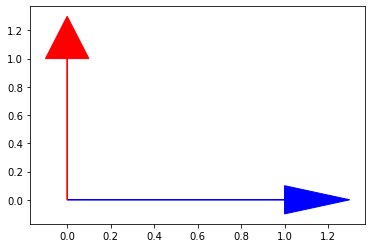

In [11]:
ex = np.array([1,0])
ey = np.array([0,1])

plt.arrow(0,0,ex[0],ex[1],head_width=0.2,color='b')
plt.arrow(0,0,ey[0],ey[1],head_width=0.2,color='r')

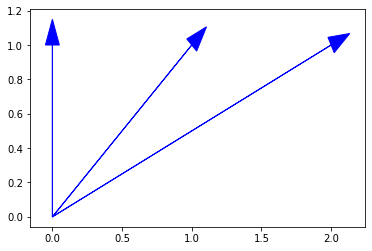

In [37]:
# alpha라는 매개변수를 바꾸고 단위 벡터를 사용하여 일직선을 생성합시다.
# alpha = 0 -> (0,1)
# alpha = 1 -> (1,1)
# alpha = 2 -> (2.1)

for alpha in np.arange(0,3,1):
    ex = np.array([1,0])
    ey = np.array([0,1])
    ex = ex*alpha
    vec = ex+ey
    plt.arrow(0,0,vec[0],vec[1],head_width=0.1,color='b')

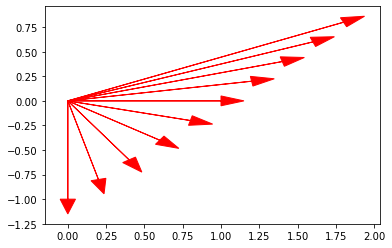

In [35]:
# A = [[1, alpha],
#      [0, alpha]]
# 이 연산자를 u = [1,1]에 적용했을 때 생성되는 벡터들을 그려라.

u = np.array([1,1])
for alpha in np.arange(-1,1,0.2):
    A = np.array([[1,alpha],
                 [0,alpha]])
    v = np.dot(A,u)
    plt.arrow(0,0,v[0],v[1],head_width=0.1,color='r')

plt.show()

In [32]:
# A*xvec = bvec
# Linear operator A*(a*xvec + b*yvec)

In [30]:
A = np.array([[1,1],
             [0,1]])

np.dot(A,ex)

array([1., 0.])

In [31]:
np.dot(A,ey)

array([1, 1])

In [39]:
# A = np.array([[1,2],
#              [0,3]])
# b = np.array([5,4])

# A*x = b 를 성립하는 x를 쓰시오.
# 가) 역행렬
# 나) linalg.solve
# 다) 소거법을 사용

A = np.array([[1,2],
             [0,3]])
b = np.array([5,4])

# 가)
import numpy as np
Ainv = np.linalg.inv(A)
print(np.dot(Ainv,b))

# 나)
print(np.linalg.solve(A,b))

[2.33333333 1.33333333]
[2.33333333 1.33333333]


In [40]:
# 다)

In [43]:
# 연립방정식 풀이
# 행인 A와 B가 1차원 선상에서 등가속운동을 하고 있다. A와 B는 서로 100m 떨어져 있으며, 속력 v0 = 0 m/s로 출발한다.
# A는 가속도 a1, B는 가속도 a2로 걷는다고 가정하자. 두 사람이 반대 방향으로 걸을 때에는 두 사람이 만날 때까지 30초가 걸리며, 두 사람이 같은 방향으로 걸을 때에는 90초가 걸린다.
# a1과 a2를 구하는 script를 만들어라.

'''
t1 = 30 s
0.5*a1*t1**2 + 0.5*a2*t1**2 = 100 m

t2 = 90 s
0.5*a1*t2**2 - 0.5*a2*t2**2 = 100 m

'''

A1 = np.array([[0.5*30**2, 0.5*30**2],
              [0.5*90**2, -0.5*90**2]])
b1 = np.array([100,100])

np.linalg.solve(A1,b1)

array([0.12345679, 0.09876543])

In [44]:
# 연립방정식 풀이
# A*x = b

# a11*x1 + a12*x2 = b1
# a21*x1 + a22*x2 = b2

# a11 + a12
# a21 + a22

# 1)
"""
x_A =       a1*t^2/2
x_B = 100 - a2*t^2/2

x_A = x_B -> x1*t^2/2 = 100 - x2*t^2/2   # t = 30
             x1*t^2/2 = 100 + x2*t^2/2   # t = 90
"""

# x1*t_1^2/2 + x2*t_1^2/2 = 100
# x1*t_2^2/2 + x2*t_2^2/2 = 100

t1 = 30
t2 = 90

A = np.array([[t1**2/2, t1**2/2],
             [t2**2/2, -t2**2/2]])
b = np.array([100,100])

x = np.linalg.solve(A,b)
print('x ',x)

x  [0.12345679 0.09876543]


In [47]:
# A와 B 행인이 등속 운동을 하고 있다. 서로의 초기 거리는 100m이다.
# 서로 반대 방향으로 걸을 때 둘이 만나기까지 걸리는 시간은 5초
# 서로 같은 방향으로 걸을 때 둘이 만나기까지 걸리는 시간은 15초
# A와 B의 속도를 찾으시오.

'''
t1 = 5 s
v_a*t1 + v_b*t1 = 100 m

t2 = 15 s
v_a*t2 - v_b*t2 = 100 m

'''

A2 = np.array([[5,5],
              [15,-15]])
b2 = np.array([100,100])

np.linalg.solve(A2,b2)

array([13.33333333,  6.66666667])

In [ ]:
# Aij -> Aij - lambda * Akj, j = k, k+1, ..., n
#

# a21 - lam*a11 = 0
# -> lam = a21/a11

# (i,j) (행, 열)
# Loop in j 열을 스캔
# Loop in i 행을 스캔
#

# 소거를 해야 되는 열 범위   1, n-1
#   matlab (1,n-1)

#for j  in range(0,n-1):
#    lam = a[]